In [1]:
#【原创b站不知名数学家小P】盗版死全家  买卖同罪 ；祝盗版的、 购买盗版的、每年新年都替家人做白事。
import pandas as pd

# 加载数据文件，指定编码为 'gbk'（适用于中文字符文件）
file_path = '附件/附件2.csv'
data = pd.read_csv(file_path, encoding='gbk')
data



,品类,日期,销量
0,category84,2023/6/18,141914
1,category21,2022/8/31,130556
2,category84,2023/6/1,115928
3,category225,2023/6/1,110234
4,category21,2022/8/29,110020
...,...,...,...
59391,category210,2022/9/30,0
59392,category210,2022/8/18,0
59393,category210,2023/5/2,0
59394,category210,2022/8/5,0


In [2]:
# 将“月份”列转换为日期格式，以便于时间序列处理
data['日期'] = pd.to_datetime(data['日期'], errors='coerce')

# 去除可能的缺失值
data = data.dropna(subset=['日期'])

# 将数据按月份升序排列
data = data.sort_values(by='日期', ascending=False).reset_index(drop=True)


In [3]:
# 筛选出“品类”为“category1”的数据
data1 = data[data['品类'] == 'category67']
data1.reset_index(inplace=True,drop=True)

In [4]:
# 设置一个合并天数参数 n
n = 14 # 例如，按每7天合并为一个周期

# 复制数据，防止修改原数据
data_modified = data1.copy()

# 新增“迭代数”列，范围为 1 到 n 的循环
data_modified['迭代数'] = [(i % n) + 1 for i in range(len(data_modified))]

# 新增“周期”列，每 n 行的周期值递增 1，从 0 开始
data_modified['周期'] = [i // n for i in range(len(data_modified))]

data_modified

,品类,日期,销量,迭代数,周期
0,category67,2023-06-21,0,1,0
1,category67,2023-06-16,0,2,0
2,category67,2023-06-15,0,3,0
3,category67,2023-06-12,0,4,0
4,category67,2023-06-09,0,5,0
...,...,...,...,...,...
135,category67,2022-07-05,2,10,9
136,category67,2022-07-04,4,11,9
137,category67,2022-07-03,4,12,9
138,category67,2022-07-02,4,13,9


In [5]:
# 获取最后一个周期的值
last_cycle = data_modified['周期'].max()

# 判断最后一个周期的行数是否等于 n
last_cycle_count = data_modified[data_modified['周期'] == last_cycle].shape[0]

# 如果不等于 n，则删除最后一个周期的数据
if last_cycle_count != n:
    data_modified = data_modified[data_modified['周期'] != last_cycle]
data_modified

,品类,日期,销量,迭代数,周期
0,category67,2023-06-21,0,1,0
1,category67,2023-06-16,0,2,0
2,category67,2023-06-15,0,3,0
3,category67,2023-06-12,0,4,0
4,category67,2023-06-09,0,5,0
...,...,...,...,...,...
135,category67,2022-07-05,2,10,9
136,category67,2022-07-04,4,11,9
137,category67,2022-07-03,4,12,9
138,category67,2022-07-02,4,13,9


In [7]:
tt=[]
for d in data_modified['周期'].unique():
    sumv=data_modified[data_modified['周期']==d]['销量'].sum()
    tt.append((data_modified[data_modified['周期']==d]['销量']/sumv).to_list())
tt=pd.DataFrame(tt).mean()
tt

0     0.060763
1     0.062895
2     0.044076
3     0.077322
4     0.090690
5     0.111593
6     0.080322
7     0.066702
8     0.074833
9     0.051141
10    0.061297
11    0.071561
12    0.077228
13    0.069576
dtype: float64

In [8]:
data_modified.groupby(['周期'])['销量'].sum()

周期
0      0
1     18
2     28
3     40
4     44
5     58
6     58
7     72
8    102
9     52
Name: 销量, dtype: int64

In [9]:
data1=pd.DataFrame(data_modified.groupby(['周期'])['销量'].sum())
data1.reset_index(inplace=True)
data1 = data1.sort_values(by='周期', ascending=False).reset_index(drop=True)
data1.reset_index(inplace=True)
data1

,index,周期,销量
0,0,9,52
1,1,8,102
2,2,7,72
3,3,6,58
4,4,5,58
5,5,4,44
6,6,3,40
7,7,2,28
8,8,1,18
9,9,0,0


In [21]:
# 过滤掉销量低于5的数值
data1 = data1[data1['销量'] >= 3]
data1

,index,周期,销量
0,0,9,52
2,2,7,72
3,3,6,58
4,4,5,58
5,5,4,44
6,6,3,40
7,7,2,28
8,8,1,18


In [22]:
std_sales

22.496913368529274

In [27]:
data1

,index,周期,销量
0,0,9,52
2,2,7,72
3,3,6,58
4,4,5,58
5,5,4,44
6,6,3,40
7,7,2,28
8,8,1,18


In [28]:
from datetime import datetime


# 设定最后三天的数据为测试集，其余为训练集
train_data = data1
test_data = data1.iloc[-7:]

# 提取训练集和测试集中的库存量数据
train_series = train_data['销量'].values
test_series = test_data['销量'].values



In [29]:
# 导入所需的库
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from scipy.optimize import minimize
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False


In [30]:
# 1. ARIMA 模型预测与 MAPE 计算

In [31]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 1. 平稳性检验 (ADF 检验)
adf_test = adfuller(train_series)
adf_statistic, adf_p_value = adf_test[0], adf_test[1]

# 输出 ADF 统计量和 P 值
adf_statistic, adf_p_value


(2.051989188451812, 0.9987368128867156)

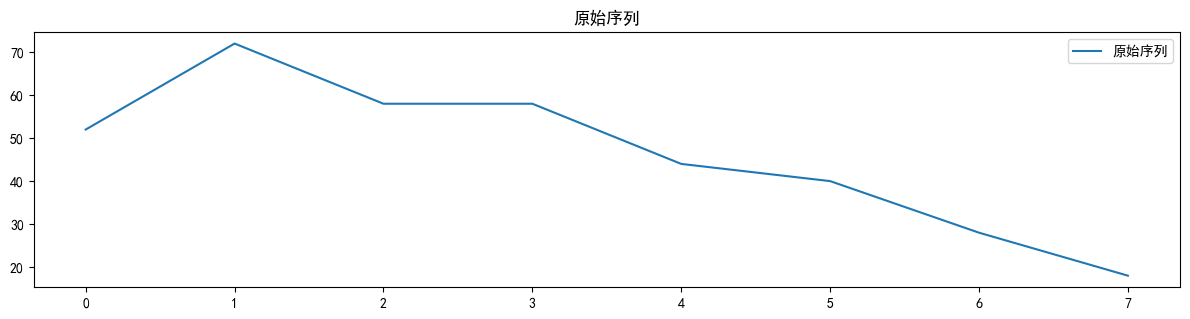

In [32]:

# 绘制原始序列和差分后的序列对比图
plt.figure(figsize=(12, 6))

# 原始序列
plt.subplot(2, 1, 1)
plt.plot(train_series, label='原始序列')
plt.title("原始序列")
plt.legend()

plt.tight_layout()
plt.show()


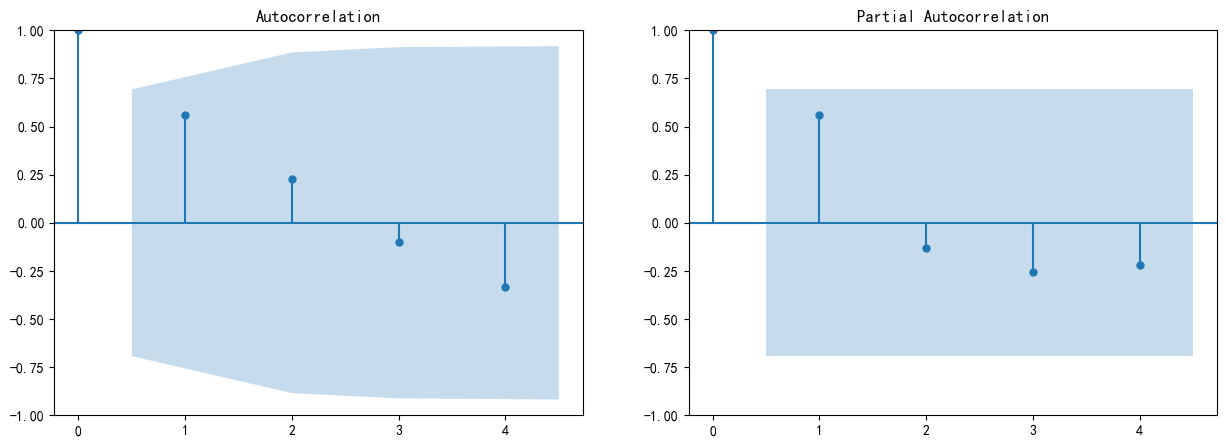

In [33]:
# 自相关和偏自相关图
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(train_series, ax=axes[0])
plot_pacf(train_series, ax=axes[1])
plt.show()


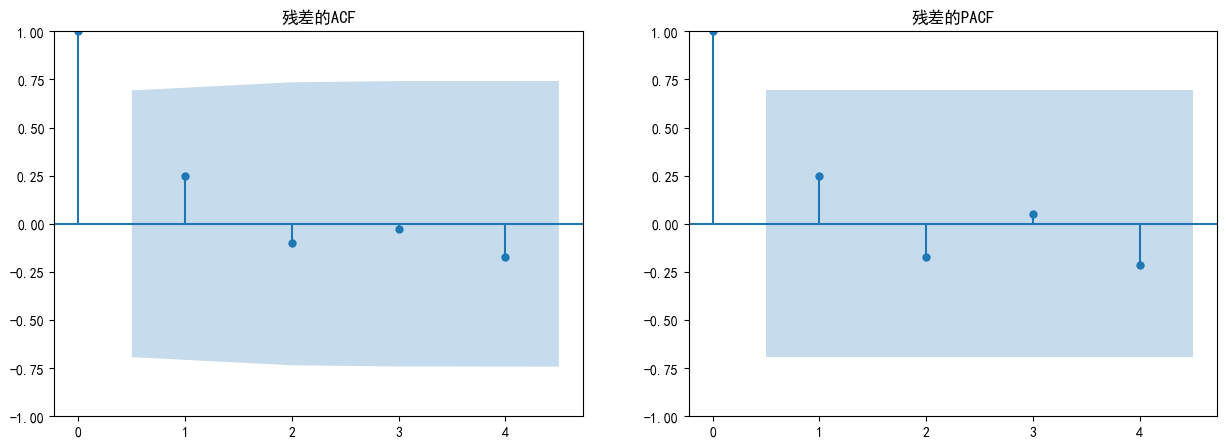

In [34]:
# 3. 构建ARIMA模型并查看模型残差白噪声性
arima_model = ARIMA(train_series, order=(1, 1, 1))
arima_fitted = arima_model.fit()

# 模型残差的 ACF 和 PACF 图
residuals = arima_fitted.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(residuals, ax=axes[0], title="残差的ACF")
plot_pacf(residuals, ax=axes[1], title="残差的PACF")
plt.show()

In [35]:
arima_fitted

In [36]:
# 白噪声检验 - Ljung-Box 检验
lb_test = arima_fitted.test_serial_correlation(method='ljungbox')
print("Ljung-Box 检验 P值:", lb_test[0][1])#P > 0.05表示模型残差为白噪声

# 模型的AIC和BIC
print("AIC:", arima_fitted.aic)
print("BIC:", arima_fitted.bic)



Ljung-Box 检验 P值: [0.16573915]
AIC: 60.85962534039683
BIC: 60.69735578756277


In [37]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error


# 1. 使用 auto_arima 自动选择最优的 (p,d,q) 值
auto_model = auto_arima(train_series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print("自动选择的最优参数 (p, d, q):", auto_model.order)

# 2. 根据最优参数构建ARIMA模型
p, d, q = auto_model.order
arima_model = ARIMA(train_series, order=(p, d, q))
arima_fitted = arima_model.fit()

# 3. 输出模型的 AIC 和 BIC 值，检验模型的白噪声性
print("AIC:", arima_fitted.aic)
print("BIC:", arima_fitted.bic)

# 4. 预测并计算测试集上的MAPE
arima_forecast = arima_fitted.forecast(steps=len(test_series))
arima_mape = mean_absolute_percentage_error(test_series, arima_forecast)
print("ARIMA模型的 MAPE:", arima_mape)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=71.039, Time=3.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86.994, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=69.040, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.98 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=71.038, Time=1.53 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=72.549, Time=3.62 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68.613, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=71.444, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=70.465, Time=7.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=70.575, Time=3.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=70.325, Time=1.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=72.409, Time=7.78 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 31.405 seconds
自动选择的最优参数 (p, d, q): (1, 0, 0)
AIC: 68.61258920059439
BIC: 68.8509138256339
ARIMA模型的 MAPE: 0.4894097296829738


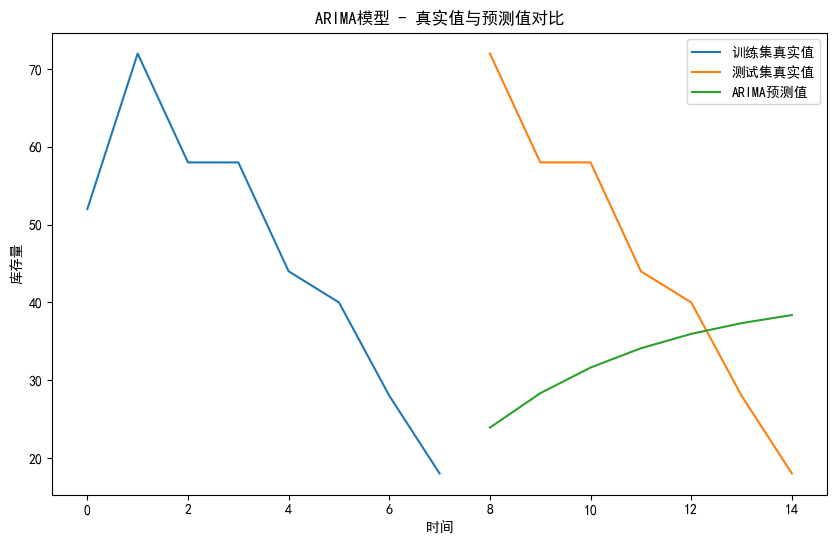

In [38]:
# ARIMA模型绘图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_series)), train_series, label='训练集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), test_series, label='测试集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), arima_forecast, label='ARIMA预测值')
plt.xlabel("时间")
plt.ylabel("库存量")
plt.title("ARIMA模型 - 真实值与预测值对比")
plt.legend()
plt.show()

In [39]:
# 2. 灰色预测（GM(1,1)）模型预测与 MAPE 计算
def grey_model_forecast(series, forecast_steps=3):
    n = len(series)
    X1 = np.cumsum(series)  
    Z1 = (X1[:-1] + X1[1:]) / 2.0  
    B = np.vstack([-Z1, np.ones(n - 1)]).T
    Y = series[1:]
    result = np.linalg.lstsq(B, Y, rcond=None)[0]
    a, b = result
    def grey_forecast(k):
        return (series[0] - b / a) * np.exp(-a * k) + b / a
    forecast = [grey_forecast(i) for i in range(n, n + forecast_steps)]
    return np.array(forecast)

grey_forecast = grey_model_forecast(train_series, forecast_steps=len(test_series))
grey_mape = mean_absolute_percentage_error(test_series, grey_forecast)
grey_mape

10.805247610952572

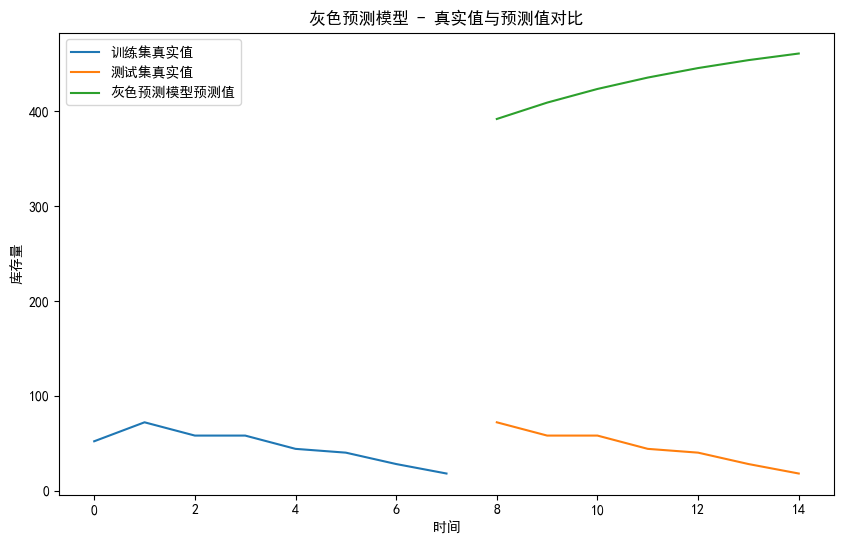

In [40]:

# 灰色预测模型绘图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_series)), train_series, label='训练集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), test_series, label='测试集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), grey_forecast, label='灰色预测模型预测值')
plt.xlabel("时间")
plt.ylabel("库存量")
plt.title("灰色预测模型 - 真实值与预测值对比")
plt.legend()
plt.show()

In [41]:
# 3. 决策树回归模型预测与 MAPE 计算
# 生成滑窗数据集的函数
def create_sliding_window_dataset(series, step=2):
    X, y = [], []
    for i in range(len(series) - step):
        X.append(series[i:i + step])  # 提取前两天的数据作为特征
        y.append(series[i + step])    # 提取下一天的数据作为目标
    return np.array(X), np.array(y)

# 创建滑窗数据集，使用步阶为2
X_train, y_train = create_sliding_window_dataset(train_series, step=1)
X_test, y_test = create_sliding_window_dataset(np.concatenate([train_series[-1:], test_series]), step=1)

# 构建决策树回归模型
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# 进行预测并计算MAPE
tree_forecast = tree_model.predict(X_test)
tree_mape = mean_absolute_percentage_error(y_test, tree_forecast)

tree_mape

0.1471115091804747

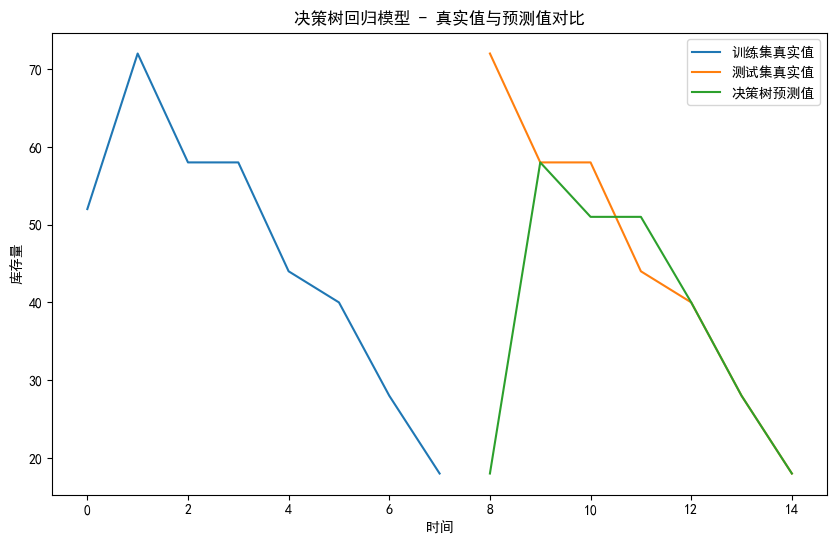

In [42]:


# 决策树回归模型绘图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_series)), train_series, label='训练集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), test_series, label='测试集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), tree_forecast, label='决策树预测值')
plt.xlabel("时间")
plt.ylabel("库存量")
plt.title("决策树回归模型 - 真实值与预测值对比")
plt.legend()
plt.show()

In [43]:
# 4. XGBoost 回归模型预测与 MAPE 计算
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=10, max_depth=3, random_state=0)
xgb_model.fit(X_train, y_train)
xgb_forecast = xgb_model.predict(X_test)
xgb_mape = mean_absolute_percentage_error(test_series, xgb_forecast)
xgb_mape

0.19166457929581313

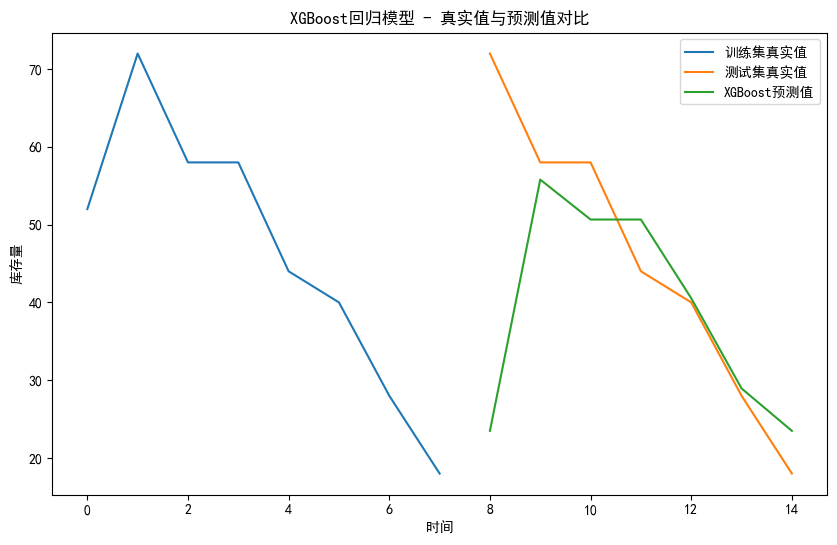

In [44]:
# XGBoost回归模型绘图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_series)), train_series, label='训练集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), test_series, label='测试集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), xgb_forecast, label='XGBoost预测值')
plt.xlabel("时间")
plt.ylabel("库存量")
plt.title("XGBoost回归模型 - 真实值与预测值对比")
plt.legend()
plt.show()

In [45]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 构建 LSTM 模型
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# 训练 LSTM 模型
lstm_model.fit(X_train_lstm, y_train, epochs=120, verbose=0)

# 进行预测并计算MAPE
lstm_forecast = lstm_model.predict(X_test_lstm,verbose=0).flatten()
lstm_mape = mean_absolute_percentage_error(y_test, lstm_forecast)

lstm_mape

CPU times: total: 9.2 s
Wall time: 8.1 s


0.2618230402007387

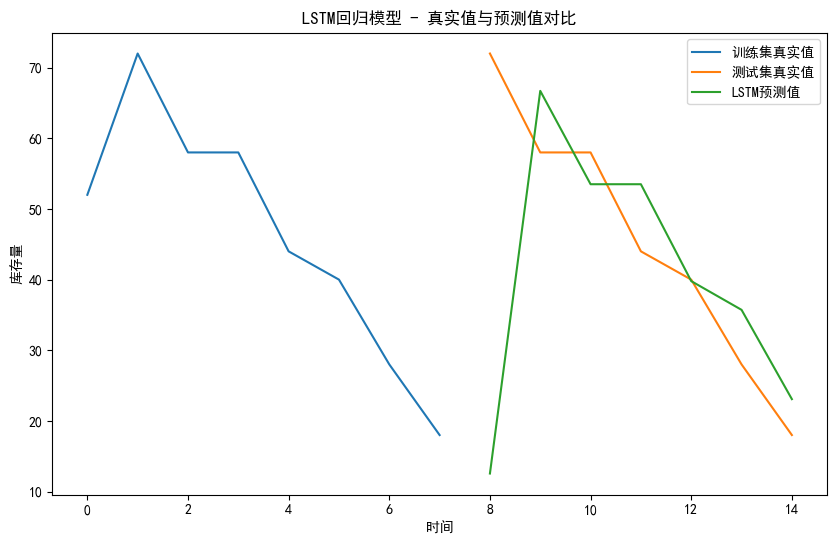

In [46]:
# LSTM回归模型绘图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_series)), train_series, label='训练集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), test_series, label='测试集真实值')
plt.plot(np.arange(len(train_series), len(train_series) + len(test_series)), lstm_forecast, label='LSTM预测值')
plt.xlabel("时间")
plt.ylabel("库存量")
plt.title("LSTM回归模型 - 真实值与预测值对比")
plt.legend()
plt.show()


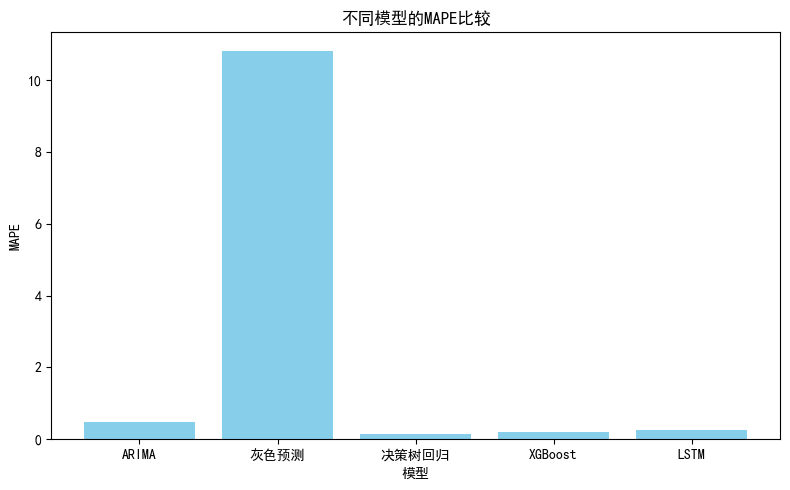

In [47]:
# 汇总 MAPE 值并绘图
mape_values = {
    'ARIMA': arima_mape,
    '灰色预测': grey_mape,
    '决策树回归': tree_mape,
    'XGBoost': xgb_mape,
    'LSTM': lstm_mape
}

plt.figure(figsize=(8, 5))
plt.bar(mape_values.keys(), mape_values.values(), color='skyblue')
plt.xlabel("模型")
plt.ylabel("MAPE")
plt.title("不同模型的MAPE比较")
plt.tight_layout()
plt.show()



In [42]:
%%time 
klist=[]
rrr = []

# 灰色预测模型函数
def grey_model_forecast(series, forecast_steps=3):
    n = len(series)
    X1 = np.cumsum(series)
    Z1 = (X1[:-1] + X1[1:]) / 2.0
    B = np.vstack([-Z1, np.ones(n - 1)]).T
    Y = series[1:]
    result = np.linalg.lstsq(B, Y, rcond=None)[0]
    a, b = result

    def grey_forecast(k):
        return (series[0] - b / a) * np.exp(-a * k) + b / a

    forecast = [grey_forecast(i) for i in range(n, n + forecast_steps)]
    return np.array(forecast)

# 生成滑窗数据集的函数
def create_sliding_window_dataset(series, step=1):
    X, y = [], []
    for i in range(len(series) - step):
        X.append(series[i:i + step])
        y.append(series[i + step])
    return np.array(X), np.array(y)

# 在循环外部定义 LSTM 模型结构
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model
n = 14  # 例如，按每7天合并为一个周期
# 初始化 LSTM 模型，但暂不训练
lstm_model = None
count=0
# 遍历每个品类的数据
for k in data['品类'].unique():
    data1 = data[data['品类'] == k]
    data1.reset_index(inplace=True,drop=True)
    count+=1
    print(count)
    
    # 复制数据，防止修改原数据
    data_modified = data1.copy()
    
    # 新增“迭代数”列，范围为 1 到 n 的循环
    data_modified['迭代数'] = [(i % n) + 1 for i in range(len(data_modified))]
    
    # 新增“周期”列，每 n 行的周期值递增 1，从 0 开始
    data_modified['周期'] = [i // n for i in range(len(data_modified))]
        # 获取最后一个周期的值
    last_cycle = data_modified['周期'].max()
    
    # 判断最后一个周期的行数是否等于 n
    last_cycle_count = data_modified[data_modified['周期'] == last_cycle].shape[0]
    
    # 如果不等于 n，则删除最后一个周期的数据
    if last_cycle_count != n:
        data_modified = data_modified[data_modified['周期'] != last_cycle]
    tt=[]
    for d in data_modified['周期'].unique():
        sumv=data_modified[data_modified['周期']==d]['销量'].sum()
        tt.append((data_modified[data_modified['周期']==d]['销量']/sumv).to_list())
    tt=pd.DataFrame(tt).mean().to_list()
    
    data1=pd.DataFrame(data_modified.groupby(['周期'])['销量'].sum())
    data1.reset_index(inplace=True)
    data1 = data1.sort_values(by='周期', ascending=False).reset_index(drop=True)
    data1.reset_index(inplace=True)
    data1 = data1[data1['销量'] >= 3]
    # 设定最后三天的数据为测试集，其余为训练集
    train_data = data1
    test_data = data1.iloc[-7:]
    
    # 提取训练集和测试集中的库存量数据
    train_series = train_data['销量'].values
    test_series = test_data['销量'].values
    
     #【原创b站不知名数学家小P】盗版死全家  买卖同罪 ；祝盗版的、 购买盗版的、每年新年都替家人做白事。
    
    try:
        # 1. ARIMA 模型
        auto_model = auto_arima(train_series, seasonal=False, error_action='ignore', suppress_warnings=True, stepwise=True)
        p, d, q = auto_model.order
        arima_model = ARIMA(train_series, order=(p, d, q))
        arima_fitted = arima_model.fit()
        arima_forecast = arima_fitted.forecast(steps=len(test_series))
        arima_mape = mean_absolute_percentage_error(test_series, arima_forecast)
        
        # 2. 灰色模型
        grey_forecast = grey_model_forecast(train_series, forecast_steps=len(test_series))
        grey_mape = mean_absolute_percentage_error(test_series, grey_forecast)
    # 3. 决策树回归
        X_train, y_train = create_sliding_window_dataset(train_series)
        X_test, y_test = create_sliding_window_dataset(np.concatenate([train_series[-1:], test_series]))
        tree_model = DecisionTreeRegressor(random_state=0)
        tree_model.fit(X_train, y_train)
        tree_forecast = tree_model.predict(X_test)
        tree_mape = mean_absolute_percentage_error(y_test, tree_forecast)
     
        # 4. XGBoost 回归
        xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=10, max_depth=3, random_state=0)
        xgb_model.fit(X_train, y_train)
        xgb_forecast = xgb_model.predict(X_test)
        xgb_mape = mean_absolute_percentage_error(test_series, xgb_forecast)
        
        # 5. LSTM 模型：创建一次模型并在首次训练
        X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        
        # 初始化并训练 LSTM 模型（仅首次构建模型）
        if lstm_model is None:
            lstm_model = build_lstm_model((X_train_lstm.shape[1], 1))
        lstm_model.fit(X_train_lstm, y_train, epochs=100, verbose=0)
        lstm_forecast = lstm_model.predict(X_test_lstm,verbose=0).flatten()
        lstm_mape = mean_absolute_percentage_error(y_test, lstm_forecast)
        
        # 存储每个模型的 MAPE 值
        mape_values = {
            'ARIMA': arima_mape,
            'Grey': grey_mape,
            'Decision': tree_mape,
            'XGBoost': xgb_mape,
            'LSTM': lstm_mape,
        }
        
        # 选择 MAPE 值最小的模型
        min_mape_model = min(mape_values, key=mape_values.get)
        forecast_steps = 7
        forecast = None
        train_series_full = data1['销量'].values
        if mape_values[min_mape_model]>1:
            raise ValueError("MAPE值超过1，跳出try块")
            
        # 根据最佳模型重新训练并预测未来数据
        if min_mape_model == 'ARIMA':
            auto_model = auto_arima(train_series_full, seasonal=False, error_action='ignore', suppress_warnings=True, stepwise=True)
            p, d, q = auto_model.order
            arima_model = ARIMA(train_series_full, order=(p, d, q))
            arima_fitted = arima_model.fit()
            forecast = arima_fitted.forecast(steps=forecast_steps)
        elif min_mape_model == 'Grey':
            forecast = grey_model_forecast(train_series_full, forecast_steps=forecast_steps)
        elif min_mape_model == 'Decision':
            X_full, y_full = create_sliding_window_dataset(train_series_full)
            tree_model = DecisionTreeRegressor(random_state=0)
            tree_model.fit(X_full, y_full)
            recursive_input = train_series_full[-1:].tolist()
            forecast = []
            for _ in range(forecast_steps):
                next_pred = tree_model.predict([recursive_input])[0]
                fluctuation = np.random.uniform(0.85, 1.15)
                next_pred = next_pred * fluctuation
                forecast.append(next_pred)
                recursive_input = [next_pred]
        elif min_mape_model == 'XGBoost':
            X_full, y_full = create_sliding_window_dataset(train_series_full)
            xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=10, max_depth=3, random_state=0)
            xgb_model.fit(X_full, y_full)
            recursive_input = train_series_full[-1:].tolist()
            forecast = []
            for _ in range(forecast_steps):
                next_pred = xgb_model.predict([recursive_input])[0]
                fluctuation = np.random.uniform(0.85, 1.15)
                next_pred = next_pred * fluctuation
                forecast.append(next_pred)
                recursive_input = [next_pred]
        elif min_mape_model == 'LSTM':
            X_full, y_full = create_sliding_window_dataset(train_series_full)
            X_full_lstm = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))
            lstm_model.fit(X_full_lstm, y_full, epochs=100, verbose=0)  # 重新训练 LSTM
            forecast = []
            last_sequence = train_series_full[-1:].reshape((1, 1, 1))
            for _ in range(forecast_steps):
                next_pred = lstm_model.predict(last_sequence,verbose=0)
                next_pred = next_pred.flatten()[0] * fluctuation
                forecast.append(next_pred)
                last_sequence = next_pred.reshape((1, 1, 1))
        
        # 记录预测结果 , forecast[0], forecast[1], forecast[2]
        ddddd=[k, min_mape_model, mape_values[min_mape_model]]
        for uu1 in forecast:
            ddddd.append(uu1)
        for uu2 in tt:
            ddddd.append(uu2)
        rrr.append(ddddd)
        
    except:
        klist.append(k)
    

    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [43]:
column=['品类','最优的模型','MAPE']

for uu1 in range(7):
    column.append('第%d周期预测值'%uu1)
for uu2 in range(n):
    column.append('第%d天比例'%uu2)

In [44]:
tt=pd.DataFrame(rrr,columns=column)
tt['品类数值'] = tt['品类'].str.extract('(\d+)').astype(int)
tt= tt.sort_values(by='品类数值', ascending=True).reset_index(drop=True)
tt

,品类,最优的模型,MAPE,第0周期预测值,第1周期预测值,第2周期预测值,第3周期预测值,第4周期预测值,第5周期预测值,第6周期预测值,...,第5天比例,第6天比例,第7天比例,第8天比例,第9天比例,第10天比例,第11天比例,第12天比例,第13天比例,品类数值
0,category1,XGBoost,0.066750,372.558192,341.551038,313.691275,387.080859,337.051124,406.749049,305.826743,...,0.065033,0.071848,0.072117,0.067640,0.067196,0.073492,0.077171,0.069244,0.068594,1
1,category2,XGBoost,0.310621,186949.724008,200761.890251,209678.081246,209419.441996,180519.347232,185968.840333,192435.177474,...,0.064223,0.064950,0.080057,0.072364,0.073025,0.065579,0.074223,0.073374,0.069415,2
2,category3,ARIMA,0.442754,884.000021,884.000021,884.000021,884.000021,884.000021,884.000021,884.000021,...,0.078557,0.072755,0.061567,0.061240,0.063964,0.066940,0.067161,0.070610,0.069206,3
3,category4,XGBoost,0.290081,323.529356,352.855168,445.191321,434.095004,381.869080,536.021739,464.206586,...,0.054725,0.057774,0.071311,0.077902,0.075366,0.082045,0.067833,0.057026,0.064572,4
4,category5,Grey,0.902090,56655.683488,63807.694374,71385.690934,79415.045584,87922.641963,96936.964944,106488.196007,...,0.080322,0.086699,0.141855,0.074275,0.070926,0.063257,0.054748,0.109555,0.067961,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,category341,XGBoost,0.509231,161.043967,152.031812,99.797947,147.113946,126.327743,132.093130,136.937685,...,0.061896,0.082492,0.106629,0.061964,0.057118,0.054486,0.069928,0.078905,0.083173,341
299,category342,ARIMA,0.762357,738.510783,688.254060,644.319939,605.912997,572.337884,542.986724,517.328118,...,0.042348,0.066982,0.049553,0.057695,0.060973,0.057725,0.079366,0.083625,0.128569,342
300,category344,Grey,0.677504,3744.263207,4455.457111,5273.799412,6215.433077,7298.933167,8545.673265,9980.247092,...,0.061460,0.076275,0.060794,0.064941,0.060028,0.072821,0.068862,0.057726,0.059919,344
301,category347,ARIMA,0.589177,976.615385,976.615385,976.615385,976.615385,976.615385,976.615385,976.615385,...,0.069084,0.076248,0.071672,0.067138,0.068105,0.060371,0.074611,0.090358,0.080126,347


In [47]:
aa=[]
for  i in klist:
    ba=int(data[data['品类']=='category82']['销量'].mean())
    aa.append([i, '无', np.nan, ba, ba, ba, ba, ba,
       ba, ba, 1/n, 1/n,  1/n, 1/n, 1/n, 1/n, 1/n, 1/n, 1/n, 1/n, 1/n, 1/n, 1/n, 1/n,'无'])
    

In [48]:
tt=pd.concat([tt,pd.DataFrame(aa,columns=tt.columns)])

In [49]:
tt['品类数值'] = tt['品类'].str.extract('(\d+)').astype(int)
tt= tt.sort_values(by='品类数值', ascending=True).reset_index(drop=True)
tt

,品类,最优的模型,MAPE,第0周期预测值,第1周期预测值,第2周期预测值,第3周期预测值,第4周期预测值,第5周期预测值,第6周期预测值,...,第5天比例,第6天比例,第7天比例,第8天比例,第9天比例,第10天比例,第11天比例,第12天比例,第13天比例,品类数值
0,category1,XGBoost,0.066750,372.558192,341.551038,313.691275,387.080859,337.051124,406.749049,305.826743,...,0.065033,0.071848,0.072117,0.067640,0.067196,0.073492,0.077171,0.069244,0.068594,1
1,category2,XGBoost,0.132831,186949.724008,200761.890251,209678.081246,209419.441996,180519.347232,185968.840333,192435.177474,...,0.064223,0.064950,0.080057,0.072364,0.073025,0.065579,0.074223,0.073374,0.069415,2
2,category3,ARIMA,0.153820,884.000021,884.000021,884.000021,884.000021,884.000021,884.000021,884.000021,...,0.078557,0.072755,0.061567,0.061240,0.063964,0.066940,0.067161,0.070610,0.069206,3
3,category4,XGBoost,0.188213,323.529356,352.855168,445.191321,434.095004,381.869080,536.021739,464.206586,...,0.054725,0.057774,0.071311,0.077902,0.075366,0.082045,0.067833,0.057026,0.064572,4
4,category5,Grey,0.133037,56655.683488,63807.694374,71385.690934,79415.045584,87922.641963,96936.964944,106488.196007,...,0.080322,0.086699,0.141855,0.074275,0.070926,0.063257,0.054748,0.109555,0.067961,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,category346,无,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,346
346,category347,ARIMA,0.056664,976.615385,976.615385,976.615385,976.615385,976.615385,976.615385,976.615385,...,0.069084,0.076248,0.071672,0.067138,0.068105,0.060371,0.074611,0.090358,0.080126,347
347,category348,无,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,348
348,category349,无,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,349


In [50]:
tt.columns

Index(['品类', '最优的模型', 'MAPE', '第0周期预测值', '第1周期预测值', '第2周期预测值', '第3周期预测值',
       '第4周期预测值', '第5周期预测值', '第6周期预测值', '第0天比例', '第1天比例', '第2天比例', '第3天比例',
       '第4天比例', '第5天比例', '第6天比例', '第7天比例', '第8天比例', '第9天比例', '第10天比例',
       '第11天比例', '第12天比例', '第13天比例', '品类数值'],
      dtype='object')

In [51]:
# Extract relevant columns for weekly values and daily ratios
week_cols = [f'第{i}周期预测值' for i in range(7)]
day_ratio_cols = [f'第{i}天比例' for i in range(14)]

# Compute daily predictions based on weekly predictions and daily ratios
daily_predictions = pd.DataFrame()

for week in week_cols:
    for day, ratio in enumerate(day_ratio_cols):
        daily_predictions[f'{week} 第{day}天预测值'] = tt[week] * tt[ratio].values[0]

In [52]:
daily_predictions

,第0周期预测值 第0天预测值,第0周期预测值 第1天预测值,第0周期预测值 第2天预测值,第0周期预测值 第3天预测值,第0周期预测值 第4天预测值,第0周期预测值 第5天预测值,第0周期预测值 第6天预测值,第0周期预测值 第7天预测值,第0周期预测值 第8天预测值,第0周期预测值 第9天预测值,...,第6周期预测值 第4天预测值,第6周期预测值 第5天预测值,第6周期预测值 第6天预测值,第6周期预测值 第7天预测值,第6周期预测值 第8天预测值,第6周期预测值 第9天预测值,第6周期预测值 第10天预测值,第6周期预测值 第11天预测值,第6周期预测值 第12天预测值,第6周期预测值 第13天预测值
0,28.592900,30.351632,27.772363,26.496653,23.762527,24.228515,26.767717,26.867910,25.199926,25.034474,...,19.506258,19.888780,21.973168,22.055414,20.686195,20.550378,22.475820,23.600923,21.176729,20.977984
1,14347.919252,15230.450733,13936.173735,13296.022239,11924.037447,12157.870304,13432.042183,13482.318683,12645.324486,12562.300393,...,12273.910937,12514.604886,13826.163345,13877.915051,13016.361883,12930.901709,14142.446640,14850.394575,13325.020191,13199.964370
2,67.844769,72.017859,65.897813,62.870828,56.383337,57.489026,63.514004,63.751739,59.793975,59.401392,...,56.383337,57.489026,63.514004,63.751739,59.793975,59.401392,64.966932,68.219071,61.211876,60.637400
3,24.830061,26.357343,24.117507,23.009681,20.635367,21.040031,23.245073,23.332080,21.883604,21.739925,...,29.608050,30.188670,33.352509,33.477349,31.399046,31.192892,34.115472,35.823237,32.143614,31.841945
4,4348.180647,4615.634501,4223.399913,4029.400052,3613.615880,3684.479640,4070.621310,4085.857757,3832.204115,3807.043411,...,6792.035899,6925.229137,7651.008571,7679.646505,7202.887298,7155.596050,7826.030820,8217.789227,7373.690094,7304.487732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
346,74.952765,79.563062,72.801828,69.457711,62.290535,63.512066,70.168272,70.430914,66.058500,65.624787,...,62.290535,63.512066,70.168272,70.430914,66.058500,65.624787,71.773421,75.366282,67.624952,66.990290
347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
daily_predictions.to_csv('未来3月销售量预测结果.csv',index=None)

In [ ]:
#【原创b站不知名数学家小P】盗版死全家  买卖同罪 ；祝盗版的、 购买盗版的、每年新年都替家人做白事。